In [26]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import copy
import math


Tree Data Structure

In [3]:
class TreeNode:
    def __init__(self, val = None, child = [], parent = None):
        self.val = val
        self.child = child
        self.parent = parent

Priority Queue Data Structure

In [29]:
import ctypes


class PriorityQueue(object):
    """
    Implementation of the queue data structure
    """
    def __init__(self):
        self.l = 0
        self.queue = []      
    
    def enqueue(self, item):
        """
        Add new item to the queue
        """
        
        self.queue.append(item)
        self.l += 1
        j = self.l - 2
        while (j >= 0) and (item[0] > self.queue[j][0]):
            self.queue[j+1] = self.queue[j]
            j -= 1
        self.queue[j+1] = item    
        
    def dequeue(self):
        """
        Remove item with lowest key
        """
        x = self.queue[self.l-1]
        self.l -= 1
        return x[1]

In [4]:
def width(root): 
  dequeue = 0
  enqueue = 1
  max_width = 1
  queue = [root]
  
  while len(queue) > 0:
    node = queue.pop(0)
    dequeue += 1

    if dequeue == enqueue:
      enqueue = 0
      dequeue = 0
    
    for i in range(len(node.child)):
      queue.append(node.child[i])

    if enqueue == 0:
      enqueue += len(queue)
      max_width = max(enqueue,max_width)
  return max_width

In [5]:
def graph_tree_spring(root):
    graph = nx.Graph()
    queue = [root]
  
    while len(queue) > 0:
        node = queue.pop(0)
        for i in range(len(node.child)):
            queue.append(node.child[i])
            graph.add_edge(node,node.child[i])
    nx.draw_spring(graph, with_labels=False)

In [6]:
def graph_tree_small(root):
    graph = nx.Graph()
    queue = [root]
  
    while len(queue) > 0:
        node = queue.pop(0)
        for i in range(len(node.child)):
            queue.append(node.child[i])
            graph.add_edge(node,node.child[i])
    nx.draw_spring(graph, with_labels=False,node_size=10)

# Deber 1 Inteligencia Artificial 
### Gabriel Oña 00320597

## 8-Tile:

El 8-tile es un juego clásico que consiste en tener ocho baldosas en un tablero 3x3
donde cada baldosa tiene un número asociado del uno al 8 y donde existe un espacio
en blanco (vacío). El tablero permite deslizar cada baldosa de izquierda a derecha, de
arriba hacia abajo y viceversa.

La idea de este juego es conseguir distintas configuraciones del tablero sea que se
inicia desde un tablero completamente ordenado, o de uno aleatorio.
Su trabajo consiste en generar el árbol (o grafo) de posibles jugadas en este tablero
para encontrar el camino (path) de jugadas que llevan desde un estado inicial del
tablero al estado final (objetivo) del tablero. Para esto, explorarán distintas estrategias
de búsqueda como son: breadth-first search, depth-first search y best-first search (la
base del algoritmo A*). Para el caso de best-first search, exploren tres heurísticas:
distancia euclideana, distancia manhattan y el número de baldosas correctamente
ubicadas en el tablero.

- a. Breadth-first search. 
- b. Depth-first search.
- c. Best-first search
    - Número de baldosas bien ubicadas
    - Distancia Euclideana
    - Distancia Manhattan

Para cada estrategia de búsqueda para un estado inicial definido y uno final deseado
comparen:

- a. El número de estados visitados.
- b. La profundidad y/o el ancho del grafo/árbol generado. 
- c. Muestre el árbol y el camino utilizado para encontrar la solución (¿es la misma
solución la que encuentran las diferentes estrategias de búsqueda?)
- d. ¿Qué sucede con el uso de Best-first search? ¿Cuál heurísitca es mejor, por
qué? ¿Qué característica tiene que tener una heurística para funcionar? 

### Resolución 

Crear el estado inicial y el objetivo al que se quiere llegar

* El -1 representa el espacio vacio.

In [7]:
def tiles_generate():
    init_matrix = np.zeros((3,3))
    for i in range(0,3):
        for j in range (0,3):
            init_matrix[i,j] = input("Escribir el valor [" + str(i+1) + "," + str(j+1) + "]: ")
    return init_matrix        


Reglas del juego:

* Si el -1 en una esquina solo puedo hacer dos movimientos.
* Si el -1 en una arista puedo hacer tres movimientos.
* Si el -1 en el centro puedo hacer 4 movimientos.

In [8]:
def swaps(i_empty,current_state_matrix):
    res = []
    new_index = np.array([i_empty[0],i_empty[1]])
    temp = copy.deepcopy(current_state_matrix)
    for i in range (-1,2):
        for j in range (-1,2):
            new_index[0] = i_empty[0] + i
            new_index[1] = i_empty[1] + j
            if (abs(i)+abs(j) == 1):
                if not(new_index[0] == -1 or new_index[1] == -1 or new_index[0] == 3 or new_index[1] == 3):
                    temp_value = temp[new_index[0],new_index[1]]
                    temp[new_index[0],new_index[1]] = -1
                    temp[i_empty[0],i_empty[1]] = temp_value
                    res.append(temp)
                    temp = copy.deepcopy(current_state_matrix)
    return res

In [9]:
def next_move(current_state_matrix):
    i_empty = np.where(current_state_matrix==-1)
    if (i_empty[0] + i_empty[1])%2 != 0:
        res = swaps(i_empty,current_state_matrix)   
    elif ((i_empty[0] == 1 and i_empty[1] == 1)):
        res = swaps(i_empty,current_state_matrix) 
    else:
        res = swaps(i_empty,current_state_matrix) 
    return res

Comparadores

In [10]:
def is_equal(actual,compare):
    is_equal_matrix = True
    for i in range(0,3):
        for j in range(0,3):
            if (actual[i,j] == compare[i,j]):
                is_equal_matrix = True
            else:
                is_equal_matrix = False
                break
        if is_equal_matrix == False:
            break
    return is_equal_matrix

In [11]:
def is_in_array(value, array):
    is_repeated = False
    for i in range(len(array)):
        is_repeated = is_equal(value,array[i])
        if is_repeated:
            break
    return is_repeated

Child generator

In [12]:
def childs_not_repeated(current_state,created):
    is_repeated = False
    childs = []
    moves = next_move(current_state)
    while len(moves) > 0:
                       
        current = moves.pop()
       
        for i in range(0,len(created)):
            is_repeated = is_equal(current,created[i])
            if is_repeated:
                break
        
        if is_repeated == False:
            childs.append(TreeNode(current))

    return childs

Breadth First Search

In [13]:
def BFS(visited, root, goal, queue,path):
  queue = [root]
  while len(queue) > 0:
    node = queue.pop(0)
    if not is_equal(node.val,goal):
        if not is_in_array(node.val,visited):
            visited.append(node.val)
            node.child = childs_not_repeated(node.val,visited)
            for i in range(len(node.child)):
                node.child[i].parent = node
                queue.append(node.child[i])
    else:
        path.append(node.val)
        while len(path) != 0:
            parent = node.parent
            if(parent):
                path.append(parent.val)
                node = node.parent
            else:
                break
        break    
          

Depth First Search

In [14]:
def DFS(visited,root,goal,path):
    root.child = childs_not_repeated(root.val,visited)
    if is_equal(root.val,goal):
        path.append(root.val)
        visited.append(root.val)
        return
    
    if not is_in_array(root.val,visited):
        visited.append(root.val)
        for i in range(len(root.child)):
            DFS(visited,root.child[i],goal,path)
            if len(path) != 0:
                path.append(root.val)
                break 
        return

Best First Search

Se van a probar 3 Heuristicas

* Baldosas bien ubicadas
* Distancia Euclediana
* Distancia Manhatan

In [44]:
def correct_tiles(current_state,goal):
    count = 0
    for i in range(3):
        for j in range(3):
            if current_state[i,j] != goal[i,j]:
                count += 1
    return count 

In [16]:
def euclidean_dist(current_state,goal):
    dist = 0
    for i in range(3):
        for j in range(3):
            current_tile = current_state[i,j]
            index = np.where(goal == current_tile)

            dist = dist + math.sqrt(pow((i-index[0]),2) + pow((j-index[1]),2))

    return dist

In [17]:
def manhattan_dist(current_state, goal):
    dist = 0
    for i in range(3):
        for j in range(3):
            current_tile = current_state[i,j]
            index = np.where(goal == current_tile)

            dist = dist + math.sqrt(pow((i-index[0]),2)) + math.sqrt(pow((j-index[1]),2))

    return dist

In [47]:
def BestFS(root,goal,visited,prior_q,heuristic,path):
    prior_q.enqueue([0, root])
    visited.append(root.val)
     
    while prior_q.l != 0:

        u = prior_q.dequeue()
        path.append(u.val)

        if is_equal(u.val,goal):
            break

        u.child = childs_not_repeated(u.val,visited)

        for i in range(len(u.child)):
            value = 0
            if not is_in_array(u.child[i].val,visited):
                visited.append(u.child[i].val)
                
                if heuristic == "C":
                    value = correct_tiles(u.child[i].val,goal)
                elif heuristic == "E":
                    value = euclidean_dist(u.child[i].val,goal)
                elif heuristic == "M":
                    value = manhattan_dist(u.child[i].val,goal)
                    
                prior_q.enqueue([value, u.child[i]])

Una vez definido los algoritmos de búsqueda, se realizan experimentos para determinar la eficiencia de cada intento.

* Breadth - First Search
* Depth - First Search
* Best - First Search
    * a) El número de nodos visitados
    * b) Profundidad y ancho
    * c) Mostrar el árbol y camino de la solución
    * d) Detallar resultados de Best FS

* Breath - First Search

In [116]:
initial_state = tiles_generate()
final_state = tiles_generate()

print("Initial State: ")
print(initial_state)

print("Final State: ")
print(final_state)


Initial State: 
[[ 1.  2.  3.]
 [ 7.  8. -1.]
 [ 4.  5.  6.]]
Final State: 
[[ 7.  1.  2.]
 [-1.  8.  3.]
 [ 4.  5.  6.]]


In [119]:
visited = []
queue = []
goal = final_state
path = []
root = TreeNode(initial_state,[],None)

BFS(visited,root,goal,queue,path)

In [120]:
for i in range(len(path)):
    print("Paso " + str(i+1) + ": ")
    print(path[len(path)-i-1])

Paso 1: 
[[ 1.  2.  3.]
 [ 7.  8. -1.]
 [ 4.  5.  6.]]
Paso 2: 
[[ 1.  2. -1.]
 [ 7.  8.  3.]
 [ 4.  5.  6.]]
Paso 3: 
[[ 1. -1.  2.]
 [ 7.  8.  3.]
 [ 4.  5.  6.]]
Paso 4: 
[[-1.  1.  2.]
 [ 7.  8.  3.]
 [ 4.  5.  6.]]
Paso 5: 
[[ 7.  1.  2.]
 [-1.  8.  3.]
 [ 4.  5.  6.]]


In [49]:
print("Número de nodos visitados: ")
print(len(visited))

Número de nodos visitados: 
32


In [96]:
print("Profundidad: ")
print(len(path))

Profundidad: 
5


In [95]:
print("Ancho del árbol")
print(width(root))

Ancho del árbol
26


Árbol construido


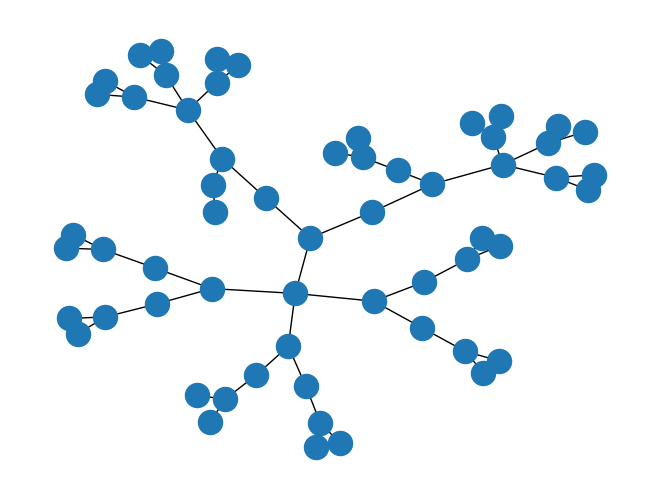

In [103]:
print("Árbol construido")
graph_tree_spring(root)

* Depth - First Search

In [122]:
initial_state = tiles_generate()
final_state = tiles_generate()

print("Initial State: ")
print(initial_state)

print("Final State: ")
print(final_state)

Initial State: 
[[ 1.  2.  3.]
 [ 7.  8. -1.]
 [ 4.  5.  6.]]
Final State: 
[[ 7.  1.  2.]
 [-1.  8.  3.]
 [ 4.  5.  6.]]


In [123]:
visited = []
path = []
root = TreeNode(initial_state)
goal = final_state

DFS(visited,root,goal,path)

In [124]:
for i in range(len(path)):
    print("Paso " + str(i+1) + ": ")
    print(path[len(path)-i-1])

Paso 1: 
[[ 1.  2.  3.]
 [ 7.  8. -1.]
 [ 4.  5.  6.]]
Paso 2: 
[[ 1.  2.  3.]
 [ 7.  8.  6.]
 [ 4.  5. -1.]]
Paso 3: 
[[ 1.  2.  3.]
 [ 7.  8.  6.]
 [ 4. -1.  5.]]
Paso 4: 
[[ 1.  2.  3.]
 [ 7.  8.  6.]
 [-1.  4.  5.]]
Paso 5: 
[[ 1.  2.  3.]
 [-1.  8.  6.]
 [ 7.  4.  5.]]
Paso 6: 
[[ 1.  2.  3.]
 [ 8. -1.  6.]
 [ 7.  4.  5.]]
Paso 7: 
[[ 1.  2.  3.]
 [ 8.  4.  6.]
 [ 7. -1.  5.]]
Paso 8: 
[[ 1.  2.  3.]
 [ 8.  4.  6.]
 [ 7.  5. -1.]]
Paso 9: 
[[ 1.  2.  3.]
 [ 8.  4. -1.]
 [ 7.  5.  6.]]
Paso 10: 
[[ 1.  2.  3.]
 [ 8. -1.  4.]
 [ 7.  5.  6.]]
Paso 11: 
[[ 1.  2.  3.]
 [ 8.  5.  4.]
 [ 7. -1.  6.]]
Paso 12: 
[[ 1.  2.  3.]
 [ 8.  5.  4.]
 [ 7.  6. -1.]]
Paso 13: 
[[ 1.  2.  3.]
 [ 8.  5. -1.]
 [ 7.  6.  4.]]
Paso 14: 
[[ 1.  2.  3.]
 [ 8. -1.  5.]
 [ 7.  6.  4.]]
Paso 15: 
[[ 1.  2.  3.]
 [ 8.  6.  5.]
 [ 7. -1.  4.]]
Paso 16: 
[[ 1.  2.  3.]
 [ 8.  6.  5.]
 [ 7.  4. -1.]]
Paso 17: 
[[ 1.  2.  3.]
 [ 8.  6. -1.]
 [ 7.  4.  5.]]
Paso 18: 
[[ 1.  2. -1.]
 [ 8.  6.  3.]
 [ 7.  4.  5.]]
P

In [125]:
print("Número de nodos visitados: ")
print(len(visited))

Número de nodos visitados: 
554


In [126]:
print("Profundidad: ")
print(len(path))

Profundidad: 
553


In [127]:
print("Ancho del árbol")
print(width(root))

Ancho del árbol
3


Árbol construido


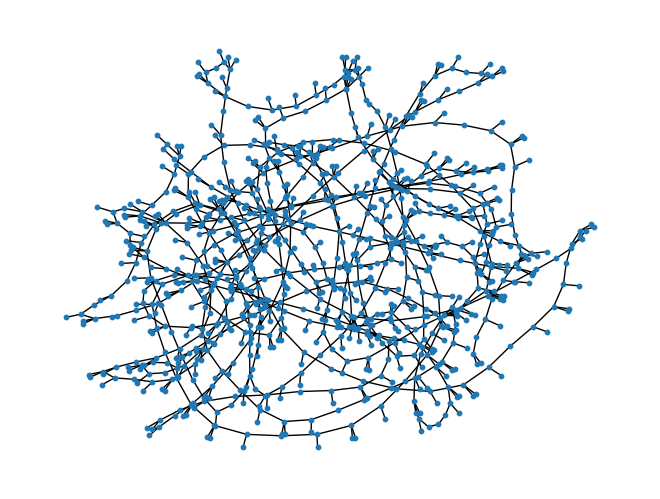

In [143]:
print("Árbol construido")
graph_tree_small(root)

* Best - First Search

In [70]:
initial_state = tiles_generate()
final_state = tiles_generate()

print("Initial State: ")
print(initial_state)

print("Final State: ")
print(final_state)

Initial State: 
[[ 1.  2.  3.]
 [ 5.  4.  8.]
 [ 7.  6. -1.]]
Final State: 
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8. -1.]]


Correct Tiles Heuristic

In [71]:
visited = []
goal = final_state
path = []
prior_q = PriorityQueue()
root = TreeNode(initial_state,[],None)

BestFS(root,goal,visited,prior_q,"C",path)

In [72]:
for i in range(len(path)):
    print("Paso " + str(i+1) + ": ")
    print(path[len(path)-i-1])

Paso 1: 
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8. -1.]]
Paso 2: 
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7. -1.  8.]]
Paso 3: 
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [-1.  7.  8.]]
Paso 4: 
[[ 1.  2.  3.]
 [-1.  5.  6.]
 [ 4.  7.  8.]]
Paso 5: 
[[ 1.  2.  3.]
 [ 5. -1.  6.]
 [ 4.  7.  8.]]
Paso 6: 
[[ 1.  2.  3.]
 [ 5.  7.  6.]
 [ 4. -1.  8.]]
Paso 7: 
[[ 1.  2.  3.]
 [ 5.  7.  6.]
 [ 4.  8. -1.]]
Paso 8: 
[[ 1.  2.  3.]
 [ 5.  7. -1.]
 [ 4.  8.  6.]]
Paso 9: 
[[ 1.  2.  3.]
 [ 5. -1.  7.]
 [ 4.  8.  6.]]
Paso 10: 
[[-1.  2.  3.]
 [ 1.  5.  7.]
 [ 4.  8.  6.]]
Paso 11: 
[[ 1.  2.  3.]
 [-1.  5.  7.]
 [ 4.  8.  6.]]
Paso 12: 
[[ 1.  2.  3.]
 [ 4.  5. -1.]
 [ 8.  6.  7.]]
Paso 13: 
[[ 1.  2.  3.]
 [ 4.  5.  7.]
 [ 8.  6. -1.]]
Paso 14: 
[[ 1.  2.  3.]
 [ 4.  5.  7.]
 [-1.  8.  6.]]
Paso 15: 
[[ 1.  2.  3.]
 [ 4.  5.  7.]
 [ 8. -1.  6.]]
Paso 16: 
[[ 1.  2.  3.]
 [ 4. -1.  7.]
 [ 8.  5.  6.]]
Paso 17: 
[[ 1.  2.  3.]
 [ 4.  7. -1.]
 [ 8.  5.  6.]]
Paso 18: 
[[-1.  2.  3.]
 [ 1.  7.  6.]
 [ 4.  8.  5.]]
P

In [73]:
print("Número de nodos visitados: ")
print(len(visited))

Número de nodos visitados: 
261


In [74]:
print("Profundidad: ")
print(len(path))

Profundidad: 
156


In [75]:
print("Ancho del árbol")
print(width(root))

Ancho del árbol
24


Árbol construido


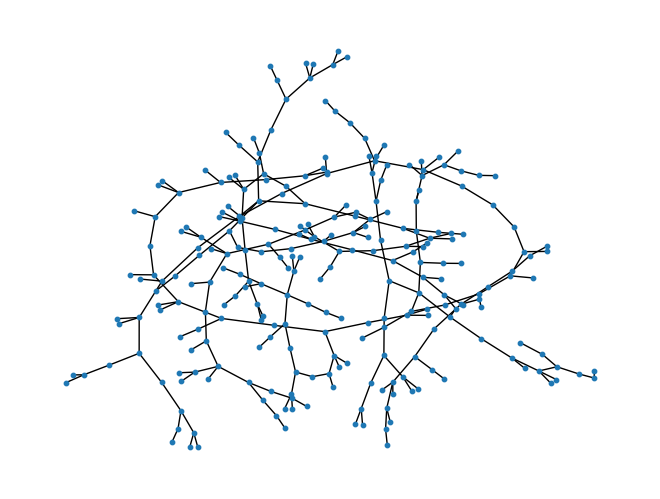

In [76]:
print("Árbol construido")
graph_tree_small(root)

Euclidean Distance Heuristic

In [77]:
visited = []
goal = final_state
path = []
prior_q = PriorityQueue()
root = TreeNode(initial_state,[],None)

BestFS(root,goal,visited,prior_q,"E",path)

In [78]:
for i in range(len(path)):
    print("Paso " + str(i+1) + ": ")
    print(path[len(path)-i-1])

Paso 1: 
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8. -1.]]
Paso 2: 
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7. -1.  8.]]
Paso 3: 
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [-1.  7.  8.]]
Paso 4: 
[[ 1.  2.  3.]
 [-1.  5.  6.]
 [ 4.  7.  8.]]
Paso 5: 
[[ 1.  2.  3.]
 [ 5. -1.  6.]
 [ 4.  7.  8.]]
Paso 6: 
[[ 1.  2.  3.]
 [ 5.  7.  6.]
 [ 4. -1.  8.]]
Paso 7: 
[[ 1.  2.  3.]
 [ 5.  7.  6.]
 [ 4.  8. -1.]]
Paso 8: 
[[ 1.  2.  3.]
 [ 5.  7. -1.]
 [ 4.  8.  6.]]
Paso 9: 
[[ 1.  2.  3.]
 [ 5. -1.  7.]
 [ 4.  8.  6.]]
Paso 10: 
[[ 1.  2.  3.]
 [-1.  5.  7.]
 [ 4.  8.  6.]]
Paso 11: 
[[ 1.  2.  3.]
 [ 4.  5. -1.]
 [ 8.  6.  7.]]
Paso 12: 
[[ 1.  2.  3.]
 [ 4.  5.  7.]
 [-1.  8.  6.]]
Paso 13: 
[[ 1.  2.  3.]
 [ 4.  5.  7.]
 [ 8.  6. -1.]]
Paso 14: 
[[ 1.  2.  3.]
 [ 4.  5.  7.]
 [ 8. -1.  6.]]
Paso 15: 
[[ 1.  2.  3.]
 [ 4. -1.  7.]
 [ 8.  5.  6.]]
Paso 16: 
[[ 1.  2.  3.]
 [ 4.  6.  5.]
 [-1.  8.  7.]]
Paso 17: 
[[ 1.  2.  3.]
 [ 4.  6.  5.]
 [ 8. -1.  7.]]
Paso 18: 
[[ 1.  2.  3.]
 [ 4.  7. -1.]
 [ 8.  5.  6.]]
P

In [79]:
print("Número de nodos visitados: ")
print(len(visited))

Número de nodos visitados: 
107


In [80]:
print("Profundidad: ")
print(len(path))

Profundidad: 
59


In [81]:
print("Ancho del árbol")
print(width(root))

Ancho del árbol
8


Árbol construido


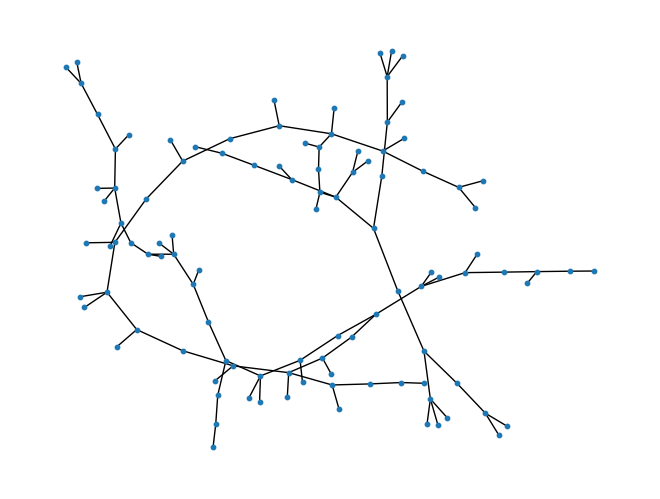

In [83]:
print("Árbol construido")
graph_tree_small(root)

Manhattan Distance Heuristic

In [84]:
visited = []
goal = final_state
path = []
prior_q = PriorityQueue()
root = TreeNode(initial_state,[],None)

BestFS(root,goal,visited,prior_q,"M",path)

In [85]:
for i in range(len(path)):
    print("Paso " + str(i+1) + ": ")
    print(path[len(path)-i-1])

Paso 1: 
[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8. -1.]]
Paso 2: 
[[ 1.  2.  3.]
 [ 4.  5. -1.]
 [ 7.  8.  6.]]
Paso 3: 
[[ 1.  2.  3.]
 [ 4. -1.  5.]
 [ 7.  8.  6.]]
Paso 4: 
[[ 1.  2.  3.]
 [-1.  4.  5.]
 [ 7.  8.  6.]]
Paso 5: 
[[ 1.  2.  3.]
 [ 7.  4.  5.]
 [-1.  8.  6.]]
Paso 6: 
[[ 1.  2.  3.]
 [ 7.  4.  5.]
 [ 8. -1.  6.]]
Paso 7: 
[[ 1.  2.  3.]
 [ 7. -1.  5.]
 [ 8.  4.  6.]]
Paso 8: 
[[ 1.  2. -1.]
 [ 7.  5.  3.]
 [ 8.  4.  6.]]
Paso 9: 
[[ 1.  2. -1.]
 [ 5.  6.  3.]
 [ 7.  8.  4.]]
Paso 10: 
[[ 1.  2.  3.]
 [ 5.  6.  4.]
 [-1.  7.  8.]]
Paso 11: 
[[ 1.  2.  3.]
 [ 5.  6.  4.]
 [ 7. -1.  8.]]
Paso 12: 
[[ 1.  2.  3.]
 [ 5.  6.  4.]
 [ 7.  8. -1.]]
Paso 13: 
[[ 1.  2.  3.]
 [ 5.  6. -1.]
 [ 7.  8.  4.]]
Paso 14: 
[[ 1.  2.  3.]
 [ 7.  5. -1.]
 [ 8.  4.  6.]]
Paso 15: 
[[ 1.  2.  3.]
 [ 7.  5.  6.]
 [ 8.  4. -1.]]
Paso 16: 
[[ 1.  2.  3.]
 [ 7.  5.  6.]
 [ 8. -1.  4.]]
Paso 17: 
[[ 1.  2.  3.]
 [ 7.  5.  6.]
 [-1.  8.  4.]]
Paso 18: 
[[ 1.  2.  3.]
 [-1.  5.  6.]
 [ 7.  8.  4.]]
P

In [86]:
print("Número de nodos visitados: ")
print(len(visited))

Número de nodos visitados: 
46


In [87]:
print("Profundidad: ")
print(len(path))

Profundidad: 
26


In [88]:
print("Ancho del árbol")
print(width(root))

Ancho del árbol
4


Árbol construido


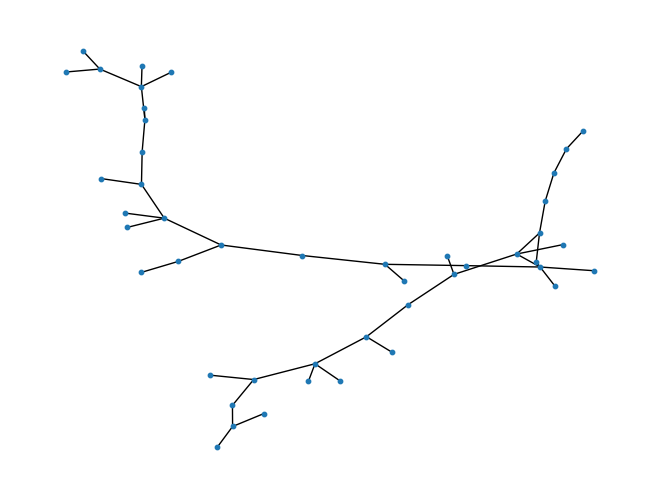

In [89]:
print("Árbol construido")
graph_tree_small(root)

Conclusión

* Se puede observar que Breadth First Search tiene como principal problema que el árbol de movimientos se ensancha sumamente cuando aumenta el número de nodos visitados.

* Para el mismo escenario de búsqueda, se obtuvo que BFS genera varios nodos, DFS genera una sola rama sumamente grande y Best FS es el mejor de todos.

* Los diferentes algoritmos de búsqueda dan como resultado diferentes soluciones.

* Para árboles pequeños en donde la solución se encuentra en pocos pasos, Best FS no difiere mucho en ancho y profundidad entre las 3 eurísticas. Sin embargo, si se busca una solución que requiera más ramas del árbol, la heurística de Manhattan Distance es la que mejor desempeño tiene.

* Manhattan es la mejor heurística porque logra modelar el peso numérico del estado actual de la jugada de mejor forma. Esto quiere decir, que la distancia Manhattan es un valor más certero para caracterizar lo cerca que se encuentra el algoritmo para encontrar la solución.

## 8 - Queens:

El problema de las 8 reinas en un tablero de ajedrez (8x8) es un problema clásico de computación y usualmente se utiliza para probar el concepto de backtracking (si no están familiarizados con el concepto, agreguen una pequeña definición en su informe).  En esta ocasión, utilizando un lenguaje imperativo (C++, Java, C, Python, etc) cree un programa que permita resolver el problema genérico de ubicar N reinas (de ajedrez) en un tablero de dimensiones NxN.  

* a. Tomando en cuenta un orden absoluto para las ubicaciones del tablero. Genere todas las soluciones posibles a este problema para tableros de: 

    * 5x5 (5 Reinas)
    * 8x8 (8 Reinas)
    * 11x11 (11 Reinas) 
    * 27x27 (27 Reinas)

### Resolución

Tenemos algunas reglas que considerar:

* No reinas en misma columna
* No reinas en misma fila
* No reinas en la misma diagonal

Si nos damos cuenta, cuando se coloca una reina, automáticamente se elimina la fila y la columna, reduciendo así la matriz del tablero. Es por esta ventaja que podemos representar con 1 solo vector N la posición de la siguiente reina.

Si existen números consecutivos en el arreglo, significa que las reinas están en la diagonal. Por lo tanto, se debe evitar este caso.

In [309]:
def is_consecutive(array):
    for i in range(len(array)-1):
        if (array[i] + 1 == array[i+1] or array[i]-1 == array[i+1]) and (array[i] + array[i+1]) > 1:
            return True
    return False

In [310]:
def next_queen(column):
    child = []
    index = np.where(column == 0)
    max_val = np.max(column)

    for i in range(len(index[0])):
        temp = copy.deepcopy(column)
        temp[index[0][i]] = max_val + 1
        if not is_consecutive(temp):
            child.append(TreeNode(temp,[],None))

    return child

La estrategia que se va a seguir es BFS

In [323]:
def BFS_queen_creation(root, N):
    queue = []
    queue = [root]
    res = []
    while len(queue) > 0:
        node = queue.pop(0)
        node.child = next_queen(node.val)
        for i in range(len(node.child)):
            node.child[i].parent = node
            queue.append(node.child[i])
            if max(node.child[i].val) == N:
                res.append(node.child[i].val)   
    return res

In [324]:
def N_queen(N):
    root = TreeNode(np.zeros(N))
    return BFS_queen_creation(root,N)

5x5 (5 Queens)

In [328]:
arrangements = N_queen(5)

In [329]:
for i in range(len(arrangements)):
    print(arrangements[i])

[1. 4. 2. 5. 3.]
[1. 3. 5. 2. 4.]
[3. 1. 4. 2. 5.]
[3. 1. 5. 2. 4.]
[4. 1. 3. 5. 2.]
[2. 4. 1. 3. 5.]
[2. 4. 1. 5. 3.]
[3. 5. 1. 4. 2.]
[5. 3. 1. 4. 2.]
[2. 5. 3. 1. 4.]
[4. 2. 5. 1. 3.]
[5. 2. 4. 1. 3.]
[4. 2. 5. 3. 1.]
[3. 5. 2. 4. 1.]


8x8 (8 Queens)

In [330]:
arrangements = N_queen(8)

In [331]:
for i in range(len(arrangements)):
    print(arrangements[i])

[1. 4. 2. 7. 3. 5. 8. 6.]
[1. 4. 2. 6. 3. 7. 5. 8.]
[1. 4. 2. 6. 3. 8. 5. 7.]
[1. 4. 2. 7. 3. 6. 8. 5.]
[1. 5. 2. 6. 3. 7. 4. 8.]
[1. 5. 2. 6. 3. 8. 4. 7.]
[1. 5. 2. 7. 3. 6. 4. 8.]
[1. 5. 2. 8. 3. 6. 4. 7.]
[1. 5. 2. 7. 3. 8. 4. 6.]
[1. 5. 2. 8. 3. 7. 4. 6.]
[1. 6. 2. 5. 3. 7. 4. 8.]
[1. 6. 2. 5. 3. 8. 4. 7.]
[1. 7. 2. 5. 3. 6. 4. 8.]
[1. 8. 2. 5. 3. 6. 4. 7.]
[1. 7. 2. 5. 3. 8. 4. 6.]
[1. 8. 2. 5. 3. 7. 4. 6.]
[1. 5. 2. 7. 3. 6. 8. 4.]
[1. 5. 2. 7. 3. 8. 6. 4.]
[1. 7. 2. 5. 3. 6. 8. 4.]
[1. 7. 2. 5. 3. 8. 6. 4.]
[1. 6. 2. 7. 3. 5. 8. 4.]
[1. 6. 2. 8. 3. 5. 7. 4.]
[1. 7. 2. 6. 3. 5. 8. 4.]
[1. 8. 2. 6. 3. 5. 7. 4.]
[1. 4. 2. 5. 7. 3. 6. 8.]
[1. 4. 2. 5. 7. 3. 8. 6.]
[1. 4. 2. 7. 5. 3. 6. 8.]
[1. 4. 2. 7. 5. 3. 8. 6.]
[1. 4. 2. 6. 8. 3. 5. 7.]
[1. 4. 2. 8. 6. 3. 5. 7.]
[1. 4. 2. 6. 8. 3. 7. 5.]
[1. 4. 2. 8. 6. 3. 7. 5.]
[1. 5. 2. 4. 7. 3. 6. 8.]
[1. 5. 2. 4. 7. 3. 8. 6.]
[1. 6. 2. 4. 7. 3. 5. 8.]
[1. 6. 2. 4. 8. 3. 5. 7.]
[1. 7. 2. 4. 6. 3. 5. 8.]
[1. 8. 2. 4. 6. 3. 5. 7.]
[1. 6. 2. 4.

11x11 (11 Queens)

In [332]:
arrangements = N_queen(11)

KeyboardInterrupt: 

In [333]:
for i in range(len(arrangements)):
    print(arrangements[i])

[1. 4. 2. 7. 3. 5. 8. 6.]
[1. 4. 2. 6. 3. 7. 5. 8.]
[1. 4. 2. 6. 3. 8. 5. 7.]
[1. 4. 2. 7. 3. 6. 8. 5.]
[1. 5. 2. 6. 3. 7. 4. 8.]
[1. 5. 2. 6. 3. 8. 4. 7.]
[1. 5. 2. 7. 3. 6. 4. 8.]
[1. 5. 2. 8. 3. 6. 4. 7.]
[1. 5. 2. 7. 3. 8. 4. 6.]
[1. 5. 2. 8. 3. 7. 4. 6.]
[1. 6. 2. 5. 3. 7. 4. 8.]
[1. 6. 2. 5. 3. 8. 4. 7.]
[1. 7. 2. 5. 3. 6. 4. 8.]
[1. 8. 2. 5. 3. 6. 4. 7.]
[1. 7. 2. 5. 3. 8. 4. 6.]
[1. 8. 2. 5. 3. 7. 4. 6.]
[1. 5. 2. 7. 3. 6. 8. 4.]
[1. 5. 2. 7. 3. 8. 6. 4.]
[1. 7. 2. 5. 3. 6. 8. 4.]
[1. 7. 2. 5. 3. 8. 6. 4.]
[1. 6. 2. 7. 3. 5. 8. 4.]
[1. 6. 2. 8. 3. 5. 7. 4.]
[1. 7. 2. 6. 3. 5. 8. 4.]
[1. 8. 2. 6. 3. 5. 7. 4.]
[1. 4. 2. 5. 7. 3. 6. 8.]
[1. 4. 2. 5. 7. 3. 8. 6.]
[1. 4. 2. 7. 5. 3. 6. 8.]
[1. 4. 2. 7. 5. 3. 8. 6.]
[1. 4. 2. 6. 8. 3. 5. 7.]
[1. 4. 2. 8. 6. 3. 5. 7.]
[1. 4. 2. 6. 8. 3. 7. 5.]
[1. 4. 2. 8. 6. 3. 7. 5.]
[1. 5. 2. 4. 7. 3. 6. 8.]
[1. 5. 2. 4. 7. 3. 8. 6.]
[1. 6. 2. 4. 7. 3. 5. 8.]
[1. 6. 2. 4. 8. 3. 5. 7.]
[1. 7. 2. 4. 6. 3. 5. 8.]
[1. 8. 2. 4. 6. 3. 5. 7.]
[1. 6. 2. 4.

27x27 (27 Queens)

In [334]:
arrangements = N_queen(27)

KeyboardInterrupt: 

In [335]:
for i in range(len(arrangements)):
    print(arrangements[i])

[1. 4. 2. 7. 3. 5. 8. 6.]
[1. 4. 2. 6. 3. 7. 5. 8.]
[1. 4. 2. 6. 3. 8. 5. 7.]
[1. 4. 2. 7. 3. 6. 8. 5.]
[1. 5. 2. 6. 3. 7. 4. 8.]
[1. 5. 2. 6. 3. 8. 4. 7.]
[1. 5. 2. 7. 3. 6. 4. 8.]
[1. 5. 2. 8. 3. 6. 4. 7.]
[1. 5. 2. 7. 3. 8. 4. 6.]
[1. 5. 2. 8. 3. 7. 4. 6.]
[1. 6. 2. 5. 3. 7. 4. 8.]
[1. 6. 2. 5. 3. 8. 4. 7.]
[1. 7. 2. 5. 3. 6. 4. 8.]
[1. 8. 2. 5. 3. 6. 4. 7.]
[1. 7. 2. 5. 3. 8. 4. 6.]
[1. 8. 2. 5. 3. 7. 4. 6.]
[1. 5. 2. 7. 3. 6. 8. 4.]
[1. 5. 2. 7. 3. 8. 6. 4.]
[1. 7. 2. 5. 3. 6. 8. 4.]
[1. 7. 2. 5. 3. 8. 6. 4.]
[1. 6. 2. 7. 3. 5. 8. 4.]
[1. 6. 2. 8. 3. 5. 7. 4.]
[1. 7. 2. 6. 3. 5. 8. 4.]
[1. 8. 2. 6. 3. 5. 7. 4.]
[1. 4. 2. 5. 7. 3. 6. 8.]
[1. 4. 2. 5. 7. 3. 8. 6.]
[1. 4. 2. 7. 5. 3. 6. 8.]
[1. 4. 2. 7. 5. 3. 8. 6.]
[1. 4. 2. 6. 8. 3. 5. 7.]
[1. 4. 2. 8. 6. 3. 5. 7.]
[1. 4. 2. 6. 8. 3. 7. 5.]
[1. 4. 2. 8. 6. 3. 7. 5.]
[1. 5. 2. 4. 7. 3. 6. 8.]
[1. 5. 2. 4. 7. 3. 8. 6.]
[1. 6. 2. 4. 7. 3. 5. 8.]
[1. 6. 2. 4. 8. 3. 5. 7.]
[1. 7. 2. 4. 6. 3. 5. 8.]
[1. 8. 2. 4. 6. 3. 5. 7.]
[1. 6. 2. 4.

### Conclusión

Este programa tiene complejidad cercana a la del $O(N!)$ sin tomar en consideración la reducción de casos por estar ubicados de forma consecutiva en el arreglo diseñado. Es por esto que la computadora no tiene el poder de cálculo suficiente para devolver de forma rápida una respuesta para los números 11! y 27!. Una vez más como en el ejercicio anterior, se demuestra que los algoritmos de fuerza bruta, como lo son DFS y BFS no son para nada escalables cuando se tiene una complejidad en tiempo y memoria que crece exponencialmente o factorial. 